Accuracy: 0.88

Confusion Matrix:
 [[25  5]
 [ 1 19]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.83      0.89        30
           1       0.79      0.95      0.86        20

    accuracy                           0.88        50
   macro avg       0.88      0.89      0.88        50
weighted avg       0.89      0.88      0.88        50

Weights (w): [[ 1.77372147 -0.3278764 ]]
Bias (b): [0.1739623]


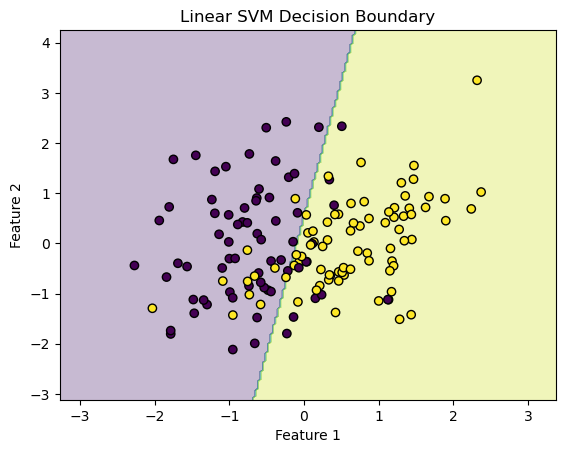

In [1]:

import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


X, y = make_classification(
    n_samples=200,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    random_state=42
)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)


y_pred = svm_model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ==============================
# 8. Model Parameters
# ==============================
print("Weights (w):", svm_model.coef_)
print("Bias (b):", svm_model.intercept_)

# ==============================
# 9. Visualization (Decision Boundary)
# ==============================
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 200),
        np.linspace(y_min, y_max, 200)
    )

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Linear SVM Decision Boundary")
    plt.show()

plot_decision_boundary(svm_model, X_train, y_train)
